<a href="https://colab.research.google.com/github/yohanesnuwara/66DaysOfData/blob/main/commodity_price_imf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.pipeline import make_pipeline

%config InlineBackend.figure_format = 'retina'

In [4]:
path = '/content/commodity_price_IMF_edited.csv'

df = pd.read_csv(path)
df = df.set_index('Commodity')

df = df.rename(columns={'Unnamed: 88': 'PCHROM', 'Unnamed: 89': 'ETMI', 
                 'Unnamed: 90': 'PLITH', 'Unnamed: 91': 'PMANGAN', 
                 'Unnamed: 92': 'PRECARB', 'Unnamed: 93': 'PSILI', 
                 'Unnamed: 94': 'PVANA'})

df

,PALLFNF,PEXGALL,PNFUEL,PFANDB,PFOOD,PBEVE,PINDU,PAGRI,PRAWM,PALLMETA,...,PMILK,PCHANA,PAPPLE,PCHROM,ETMI,PLITH,PMANGAN,PRECARB,PSILI,PVANA
Commodity,,,,,,,,,,,,,,,,,,,,,
1990M1,NaN,NaN,NaN,NaN,NaN,50.350289,NaN,NaN,72.922948,NaN,...,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990M2,NaN,NaN,NaN,NaN,NaN,51.117834,NaN,NaN,73.517506,NaN,...,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990M3,NaN,NaN,NaN,NaN,NaN,55.749862,NaN,NaN,74.241924,NaN,...,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990M4,NaN,NaN,NaN,NaN,NaN,57.600808,NaN,NaN,76.095284,NaN,...,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990M5,NaN,NaN,NaN,NaN,NaN,57.177569,NaN,NaN,75.491771,NaN,...,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022M3,238.599470,247.940206,173.520008,154.629571,157.585186,119.697173,201.640916,150.384482,121.667593,196.313266,...,28.056467,64.840549,3.159909,11617.69847,227.920997,473185.8825,6577.173913,13245.28380,3750.0,24562.34239
2022M4,226.712904,234.835131,175.272771,158.520530,161.733294,120.548887,200.964126,154.113522,124.301289,194.044295,...,28.536696,65.808831,3.006615,11874.48853,219.969621,490008.1790,6300.000000,10928.50410,3500.0,24801.97500
2022M5,224.726856,233.386254,167.606591,155.600393,158.765685,118.189825,184.561975,151.708154,125.378195,178.515934,...,28.158634,62.442256,3.181609,11790.13458,202.328613,453228.8572,6300.000000,11004.91975,3500.0,24801.97500


In [5]:
def change_datetime(df):
    # Unpack datetime column
    list_year_month = df.Commodity.values
    year = [m[:4] for m in list_year_month]
    
    # Add zero if month<9
    month = [m[5:] if int(m[5:])>9 else '0'+m[5:] for m in list_year_month]
    
    # Change '1990M1' to '1990-01-25'
    year_month = [y + '-' + m + '-25' for y, m in zip(year, month)]
    df['Commodity'] = year_month
    
    # Pandas to datetime
    df['Commodity'] = pd.to_datetime(df['Commodity'], format='%Y/%m/%d')
    return df

In [6]:
df = df.reset_index()

# Change datetime format
df = change_datetime(df)

# Reset datetime column to index
df = df.set_index('Commodity')

df

,PALLFNF,PEXGALL,PNFUEL,PFANDB,PFOOD,PBEVE,PINDU,PAGRI,PRAWM,PALLMETA,...,PMILK,PCHANA,PAPPLE,PCHROM,ETMI,PLITH,PMANGAN,PRECARB,PSILI,PVANA
Commodity,,,,,,,,,,,,,,,,,,,,,
1990-01-25,NaN,NaN,NaN,NaN,NaN,50.350289,NaN,NaN,72.922948,NaN,...,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-02-25,NaN,NaN,NaN,NaN,NaN,51.117834,NaN,NaN,73.517506,NaN,...,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-03-25,NaN,NaN,NaN,NaN,NaN,55.749862,NaN,NaN,74.241924,NaN,...,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-04-25,NaN,NaN,NaN,NaN,NaN,57.600808,NaN,NaN,76.095284,NaN,...,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-05-25,NaN,NaN,NaN,NaN,NaN,57.177569,NaN,NaN,75.491771,NaN,...,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-25,238.599470,247.940206,173.520008,154.629571,157.585186,119.697173,201.640916,150.384482,121.667593,196.313266,...,28.056467,64.840549,3.159909,11617.69847,227.920997,473185.8825,6577.173913,13245.28380,3750.0,24562.34239
2022-04-25,226.712904,234.835131,175.272771,158.520530,161.733294,120.548887,200.964126,154.113522,124.301289,194.044295,...,28.536696,65.808831,3.006615,11874.48853,219.969621,490008.1790,6300.000000,10928.50410,3500.0,24801.97500
2022-05-25,224.726856,233.386254,167.606591,155.600393,158.765685,118.189825,184.561975,151.708154,125.378195,178.515934,...,28.158634,62.442256,3.181609,11790.13458,202.328613,453228.8572,6300.000000,11004.91975,3500.0,24801.97500


In [7]:
df = df.dropna()

df = df.transpose()

# df = df.rename(index={'Unnamed: 88': 'PCHROM', 'Unnamed: 89': 'ETMI', 
#                  'Unnamed: 90': 'PLITH', 'Unnamed: 91': 'PMANGAN', 
#                  'Unnamed: 92': 'PRECARB', 'Unnamed: 93': 'PSILI', 
#                  'Unnamed: 94': 'PVANA'})

df

Commodity,2012-06-25,2012-07-25,2012-08-25,2012-09-25,2012-10-25,2012-11-25,2012-12-25,2013-01-25,2013-02-25,2013-03-25,...,2021-10-25,2021-11-25,2021-12-25,2022-01-25,2022-02-25,2022-03-25,2022-04-25,2022-05-25,2022-06-25,2022-07-25
PALLFNF,160.306871,166.277690,171.208246,172.754712,170.670329,167.225344,167.237147,172.059703,175.305465,171.173768,...,191.034528,182.550690,186.178551,191.116408,202.786201,238.599470,226.712904,224.726856,230.226432,228.703458
PEXGALL,163.972441,170.644010,175.841231,176.489508,174.146110,170.545880,170.854518,176.381923,180.387893,176.103469,...,196.543662,186.706919,191.049533,196.273119,208.904882,247.940206,234.835131,233.386254,239.623720,238.831830
PNFUEL,131.244164,133.949244,132.852848,134.596845,135.047452,133.711169,134.967886,137.675866,137.332075,134.263983,...,145.561471,145.602902,148.572696,155.841054,162.677008,173.520008,175.272771,167.606591,162.061595,148.391775
PFANDB,115.677003,122.385738,123.490542,121.265680,120.306241,119.023013,118.935320,120.253742,119.460502,119.674384,...,127.246178,129.129624,132.792035,138.743397,145.622106,154.629571,158.520530,155.600393,150.317741,140.046229
PFOOD,116.756890,123.555730,124.876440,122.343050,121.507315,120.529810,120.667882,122.095975,121.335505,121.599776,...,127.953979,129.712335,133.458459,139.892830,147.147274,157.585186,161.733294,158.765685,152.824310,142.148357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PLITH,63643.216970,63568.831820,63682.977710,64069.570210,64650.802080,64970.670680,64966.885930,65091.611800,64976.625410,65155.512690,...,142293.440700,163563.753000,184429.307600,266260.850600,341140.047600,473185.882500,490008.179000,453228.857200,443656.204900,441052.335400
PMANGAN,3038.095238,2954.545455,2644.347826,2603.125000,2668.478261,2553.636364,2530.000000,2525.652174,2535.000000,2403.333333,...,5828.571429,6209.090909,7450.000000,7507.142857,7400.000000,6577.173913,6300.000000,6300.000000,5059.090909,2887.500000
PRECARB,10842.918450,10160.193870,7154.507372,7197.939369,6838.641907,5782.766408,5721.300107,5380.604307,5173.989116,4424.139751,...,7911.970356,9971.143388,10824.302860,11440.147630,13255.960750,13245.283800,10928.504100,11004.919750,11480.420440,10294.226810
PSILI,2125.000000,2125.000000,2125.000000,2125.000000,2172.826087,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,...,2250.000000,4795.454545,5750.000000,5178.571429,4750.000000,3750.000000,3500.000000,3500.000000,3500.000000,3500.000000


In [8]:
# normalizer = Normalizer()

# clusters = np.arange(1,41)
# inert = []

# for n in clusters:
#   pipe = make_pipeline(normalizer, KMeans(n_clusters=n))
#   pipe.fit(df)
#   ine = pipe[1].inertia_
#   inert.append(ine)

# plt.plot(clusters, inert)
# plt.show()

In [9]:
# plt.bar(np.arange(2,21), np.abs(np.diff(inert)))

In [10]:
normalizer = Normalizer()
kmean = KMeans(n_clusters=20, random_state=42)
pipe = make_pipeline(normalizer, kmean)

pipe.fit(df)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp']. An error will be raised in 1.2.
  FutureWarning,


Pipeline(steps=[('normalizer', Normalizer()),
                ('kmeans', KMeans(n_clusters=20, random_state=42))])

In [11]:
labels = pipe.predict(df)

group = pd.DataFrame({'Commodity': df.index, 'Group': labels})

group

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp']. An error will be raised in 1.2.
  FutureWarning,


,Commodity,Group
0,PALLFNF,13
1,PEXGALL,6
2,PNFUEL,15
3,PFANDB,2
4,PFOOD,2
...,...,...
89,PLITH,3
90,PMANGAN,5
91,PRECARB,5
92,PSILI,13


In [12]:
group.value_counts(subset='Group')

Group
2     15
15    11
13     9
10     8
6      7
14     7
5      6
1      6
11     5
3      4
8      3
12     3
18     2
0      2
9      1
7      1
16     1
17     1
4      1
19     1
dtype: int64

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/u

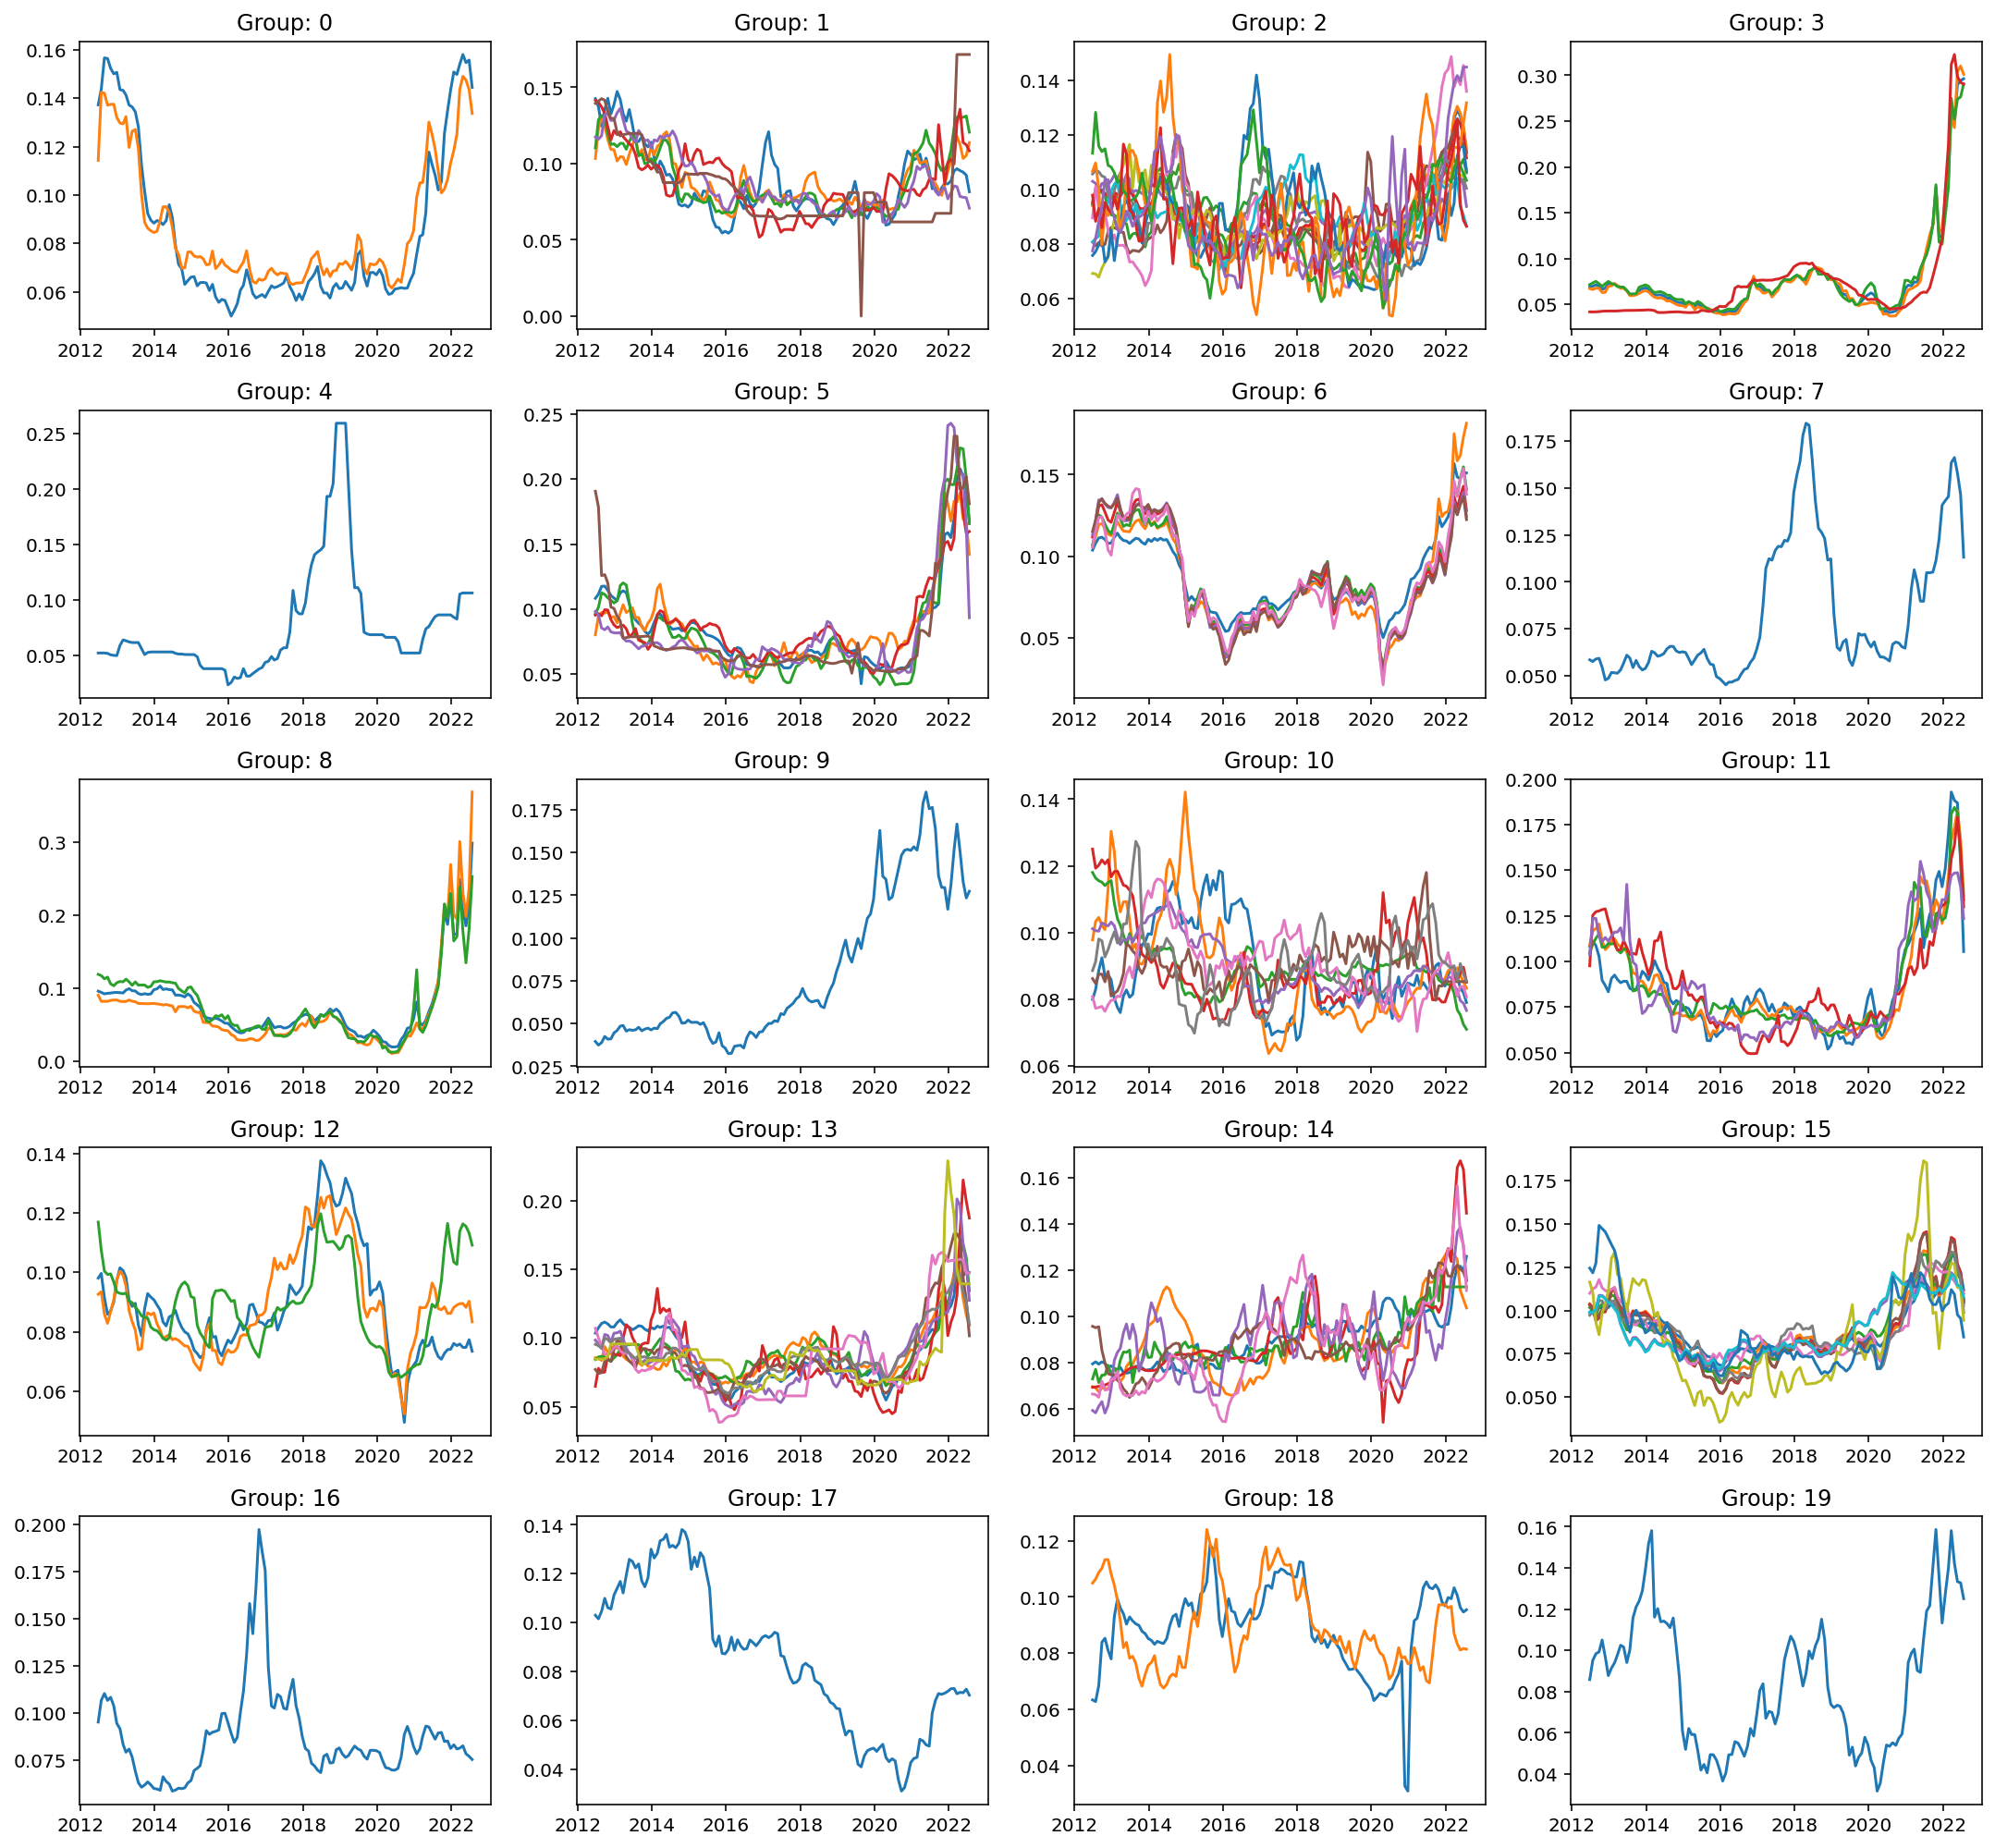

In [13]:
n_group = np.arange(20)

plt.figure(figsize=(15,14))

for n in n_group:
    group_specific = group[group.Group==n]

    commodities = list(group_specific.Commodity.values)

    df_normalized = normalizer.fit_transform(df)
    df_normalized = pd.DataFrame(df_normalized, index=df.index, columns=df.columns)

    df_ori = df_normalized.transpose()
    df_commodity = df_ori[commodities]  

    # print(df_commodity.columns.values)

    plt.subplot(5,4,n+1)
    for i in range(len(df_commodity.columns.values)):
        _ = df_commodity.iloc[:,i]
        plt.plot(_)
        plt.title(f'Group: {n}')

plt.tight_layout()
plt.show()

In [14]:
def calculate_average_trend(n_group):
    commodity_list = group[group.Group==n_group].Commodity.values
    df_normalized = normalizer.fit_transform(df)
    df_normalized = pd.DataFrame(df_normalized, index=df.index, columns=df.columns)

    df_grouped = df_normalized.transpose()[commodity_list]
    df_average = df_grouped.mean(axis=1)

    fig, ax = plt.subplots(1,1, figsize=(8,5))
    df_grouped.plot(ax=ax, alpha=0.4, title=f'CLUSTER: {n_group}')
    df_average.plot(ax=ax, color='k')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/u

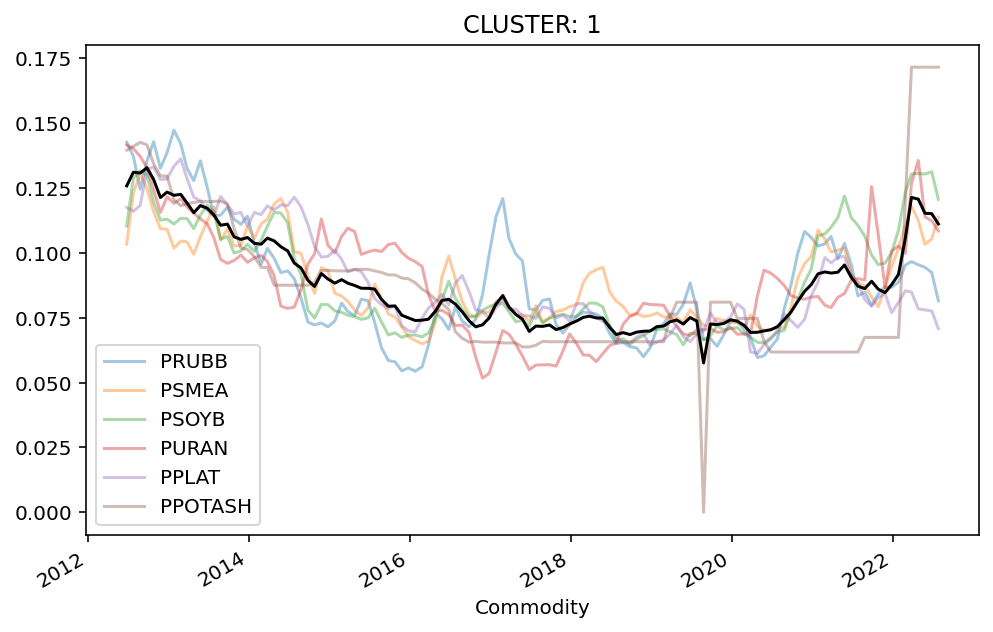

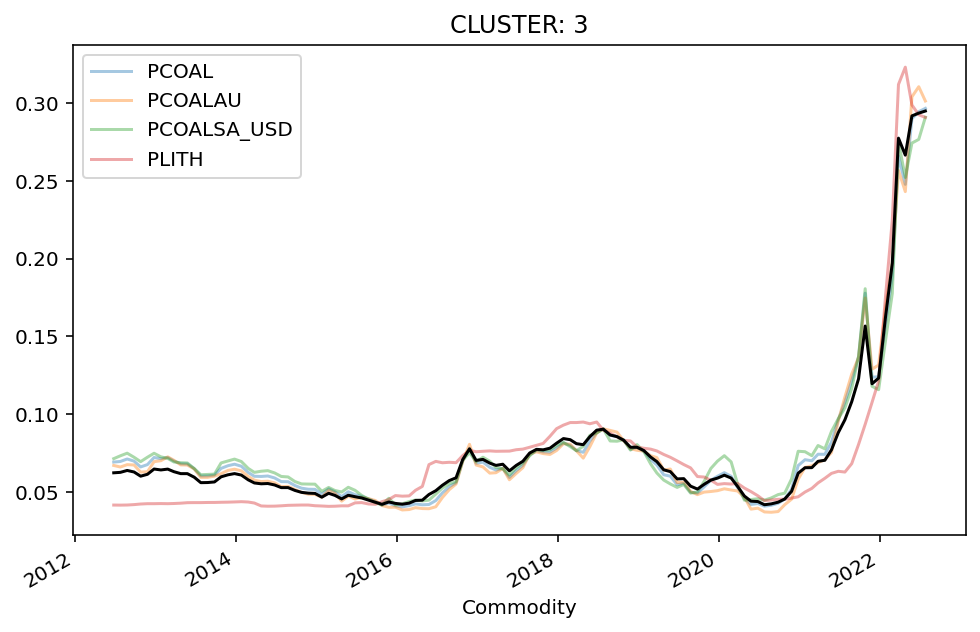

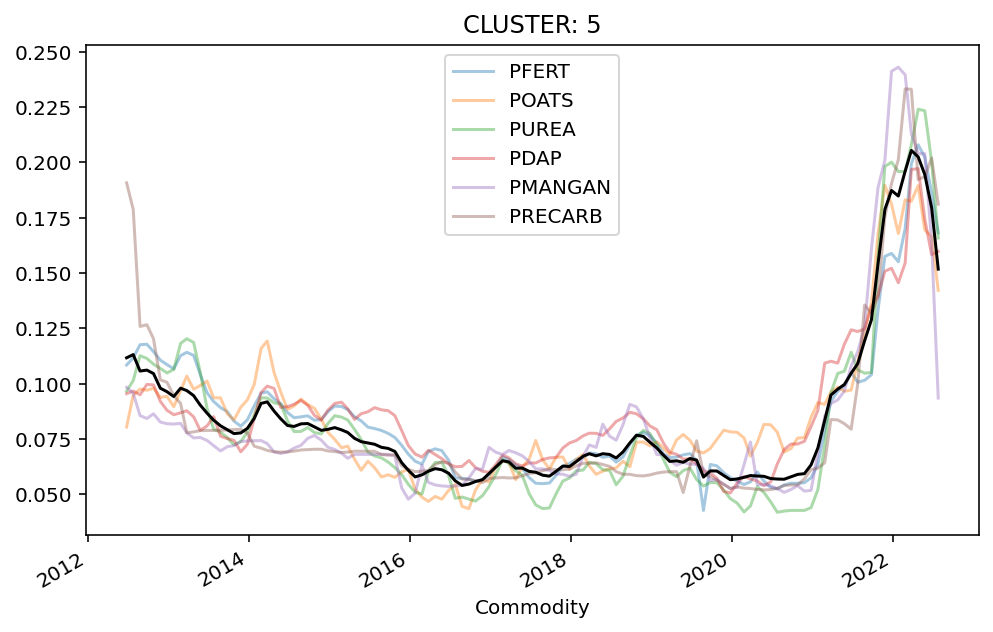

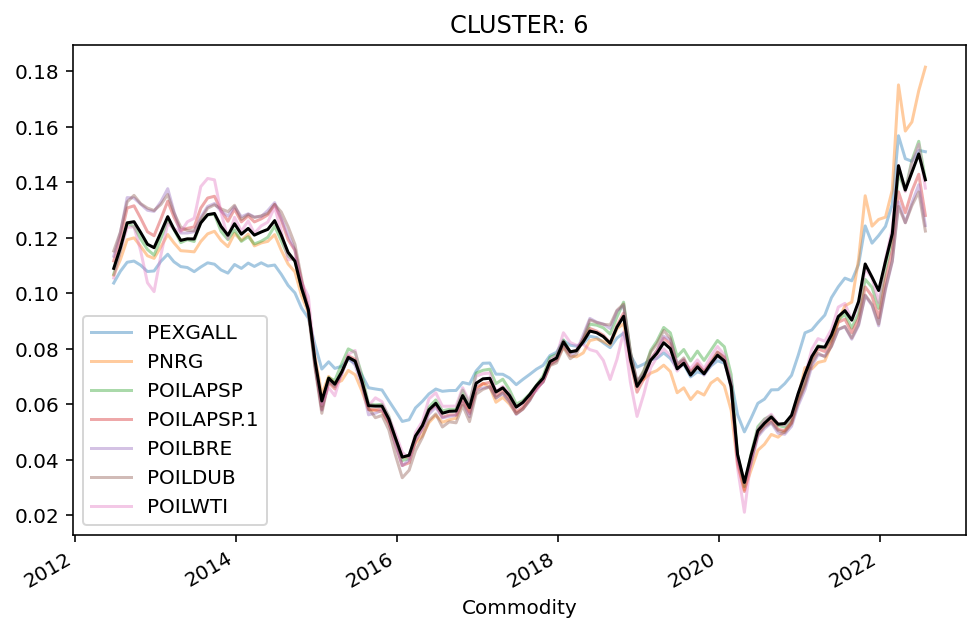

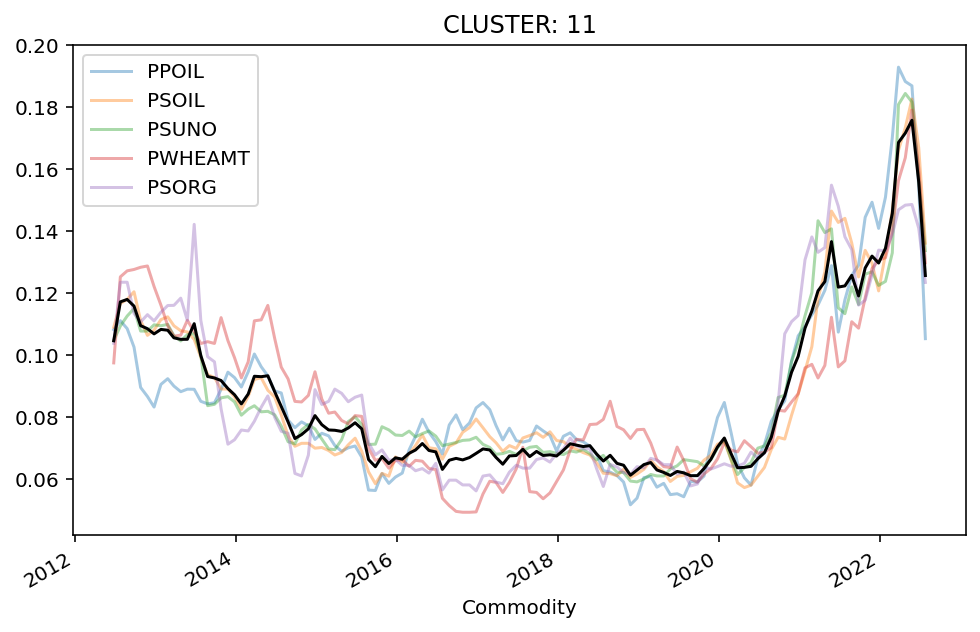

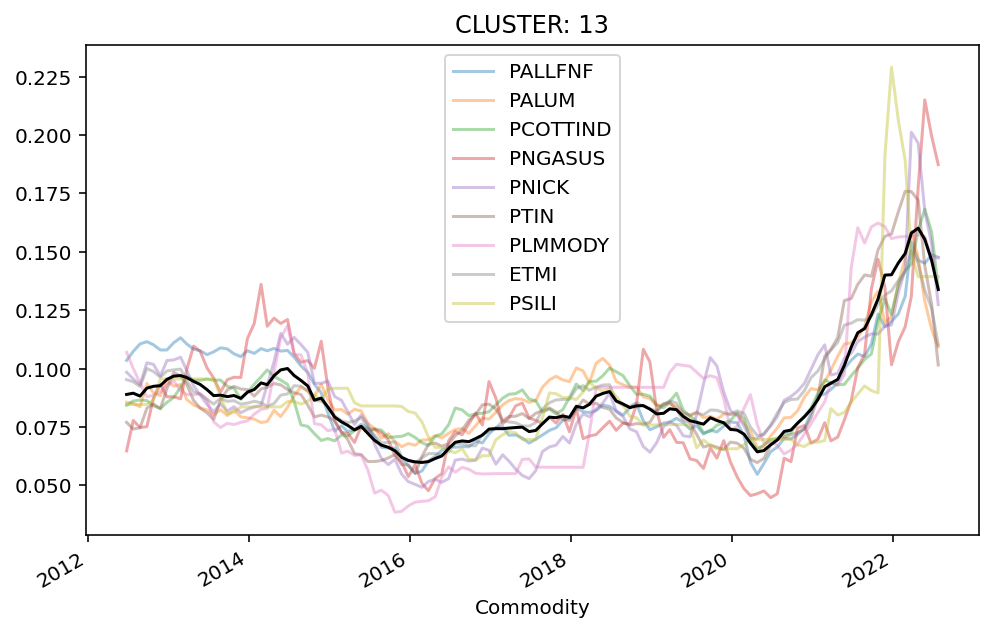

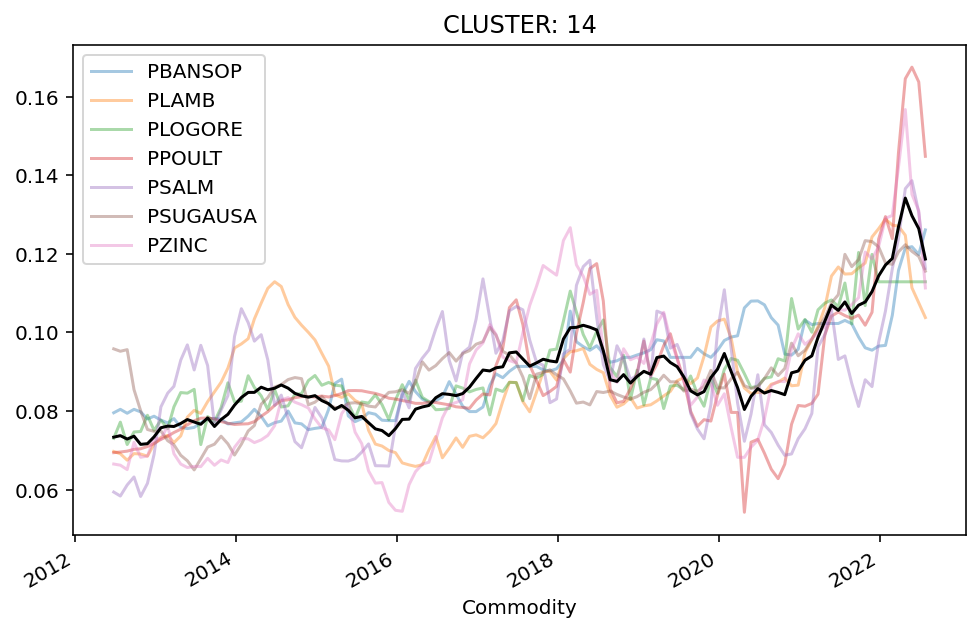

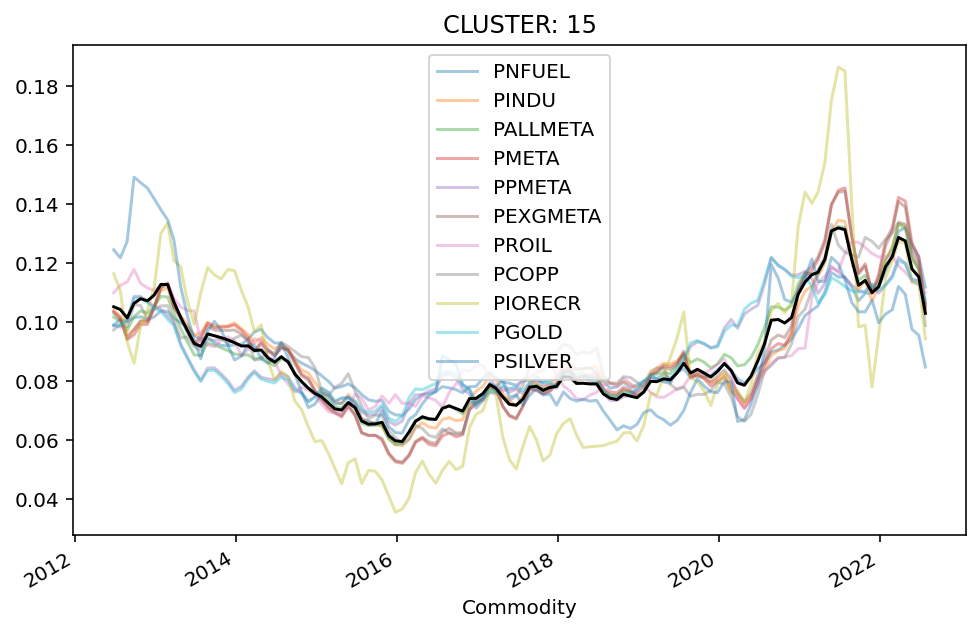

In [15]:
n_groups = [1,3,5,6,11,13,14,15]
for n_group in n_groups:
    calculate_average_trend(n_group)

In [16]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'

def df_grouped(n_group):
    commodity_list = group[group.Group==n_group].Commodity.values
    df_normalized = normalizer.fit_transform(df)
    df_normalized = pd.DataFrame(df_normalized, index=df.index, columns=df.columns)
    df_normalized = df_normalized.transpose()[commodity_list]
    return df_normalized

def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

In [17]:
df_g5 = df_grouped(n_group=15)  

df_grangers = grangers_causation_matrix(df_g5, variables = df_g5.columns)    

df_grangers

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp']. An error will be raised in 1.2.
  FutureWarning,


,PNFUEL_x,PINDU_x,PALLMETA_x,PMETA_x,PPMETA_x,PEXGMETA_x,PROIL_x,PCOPP_x,PIORECR_x,PGOLD_x,PSILVER_x
PNFUEL_y,1.0000,0.2425,0.0000,0.1060,0.0000,0.0371,0.0021,0.0142,0.0068,0.0000,0.0088
PINDU_y,0.0243,1.0000,0.0000,0.0001,0.0000,0.0000,0.0090,0.0002,0.0085,0.0000,0.0003
PALLMETA_y,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0099,0.0000,0.0477,0.0000,0.0049
PMETA_y,0.0299,0.0002,0.0000,1.0000,0.0000,0.0003,0.0183,0.0000,0.0544,0.0000,0.0001
PPMETA_y,0.0033,0.0254,0.0447,0.0447,1.0000,0.0401,0.0583,0.0573,0.0880,0.0292,0.0000
PEXGMETA_y,0.0289,0.0002,0.0000,0.0004,0.0000,1.0000,0.0323,0.0000,0.0449,0.0000,0.0002
PROIL_y,0.0008,0.0004,0.0002,0.0001,0.0001,0.0002,1.0000,0.0512,0.0000,0.0002,0.0001
PCOPP_y,0.0059,0.0015,0.0001,0.0009,0.0006,0.0006,0.0487,1.0000,0.0011,0.0004,0.0096
PIORECR_y,0.1185,0.1554,0.0535,0.4553,0.0004,0.2786,0.0119,0.0130,1.0000,0.0001,0.0002
PGOLD_y,0.0185,0.0371,0.0612,0.0657,0.0799,0.0612,0.0683,0.0791,0.2063,1.0000,0.0000


In [18]:
df_g5

,PNFUEL,PINDU,PALLMETA,PMETA,PPMETA,PEXGMETA,PROIL,PCOPP,PIORECR,PGOLD,PSILVER
Commodity,,,,,,,,,,,
2012-06-25,0.098883,0.103769,0.101627,0.103585,0.098686,0.102950,0.109908,0.097235,0.116343,0.098936,0.124475
2012-07-25,0.100921,0.101892,0.100207,0.101378,0.098224,0.100734,0.112393,0.099276,0.110566,0.098763,0.121744
2012-08-25,0.100095,0.095550,0.097147,0.093975,0.100415,0.094436,0.113530,0.098310,0.093159,0.100754,0.127359
2012-09-25,0.101409,0.097404,0.101808,0.095629,0.108671,0.097356,0.117827,0.105867,0.085964,0.108091,0.149157
2012-10-25,0.101749,0.100185,0.103709,0.099108,0.108659,0.100369,0.113049,0.105530,0.098477,0.108250,0.147288
...,...,...,...,...,...,...,...,...,...,...,...
2022-03-25,0.130735,0.133365,0.133333,0.142250,0.121828,0.140934,0.118989,0.133920,0.127342,0.120693,0.112018
2022-04-25,0.132056,0.132917,0.131792,0.141036,0.119902,0.138963,0.116887,0.133180,0.126753,0.119830,0.109386
2022-05-25,0.126280,0.122069,0.121245,0.126807,0.113853,0.125023,0.114212,0.122979,0.113292,0.114621,0.097521


In [19]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,0,1)
    d = {'0.9':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

In [20]:
# cointegration_test(df_g5, alpha=0.05)

In [21]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")

In [22]:
# ADF Test on each column
for name, column in df_g5.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "PNFUEL" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.7686
 No. Lags Chosen       = 13
 Critical value 1%     = -3.492
 Critical value 5%     = -2.889
 Critical value 10%    = -2.581
 => P-Value = 0.3962. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "PINDU" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.3062
 No. Lags Chosen       = 10
 Critical value 1%     = -3.491
 Critical value 5%     = -2.888
 Critical value 10%    = -2.581
 => P-Value = 0.17. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "PALLMETA" 
    -----------------------------------------------
 Null Hypothesis: Data has 

In [23]:
df_g5_diff = df_g5.diff().dropna()

# ADF Test on each column
for name, column in df_g5_diff.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "PNFUEL" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.3334
 No. Lags Chosen       = 11
 Critical value 1%     = -3.492
 Critical value 5%     = -2.888
 Critical value 10%    = -2.581
 => P-Value = 0.1614. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "PINDU" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.6457
 No. Lags Chosen       = 3
 Critical value 1%     = -3.488
 Critical value 5%     = -2.887
 Critical value 10%    = -2.58
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "PALLMETA" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary

In [26]:
# from statsmodels.tsa.api import VAR

# model = VAR(df_g5_diff)
# for i in [1,2,3,4,5,6,7,8,9,10,11,12]:
#     result = model.fit(i)
#     print('Lag Order =', i)
#     print('AIC : ', result.aic)
#     print('BIC : ', result.bic)
#     print('FPE : ', result.fpe)
#     print('resid: ', np.mean(np.abs(result.resid)))
#     print('HQIC: ', result.hqic, '\n')

In [27]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5, test_size=12, max_train_size=70)
X = df_g5.reset_index().copy()

for train_index, test_index in tscv.split(X):
    # Split data into training and validation set
    train, test = X.iloc[train_index], X.iloc[test_index]    
    print("TRAIN:", train_index)
    print(train)  
    print("TEST:", test_index)
    print(test)
    print("------------------------------------------- \n")

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61]
    Commodity    PNFUEL     PINDU  PALLMETA     PMETA    PPMETA  PEXGMETA  \
0  2012-06-25  0.098883  0.103769  0.101627  0.103585  0.098686  0.102950   
1  2012-07-25  0.100921  0.101892  0.100207  0.101378  0.098224  0.100734   
2  2012-08-25  0.100095  0.095550  0.097147  0.093975  0.100415  0.094436   
3  2012-09-25  0.101409  0.097404  0.101808  0.095629  0.108671  0.097356   
4  2012-10-25  0.101749  0.100185  0.103709  0.099108  0.108659  0.100369   
..        ...       ...       ...       ...       ...       ...       ...   
57 2017-03-25  0.080944  0.080467  0.076844  0.077524  0.075586  0.076897   
58 2017-04-25  0.079490  0.075639  0.074326  0.071234  0.077627  0.071391   
59 2017-05-25  0.079187  0.073259  0.071880  0.068048  0.076086  0.068203   
60 2017-06-25  0.078457  0.071451

In [28]:
from sklearn.metrics import mean_absolute_error

lags = np.arange(1,12+1)

# Parameters for time series train test split
n_splits = 5
n_month_forecast = 12

tscv = TimeSeriesSplit(n_splits=n_splits, test_size=n_month_forecast, max_train_size=70)
X = df_g5_diff.reset_index().copy()
column_name = X.columns.values[1:]

MAE_final = []
for l in lags:
    print('%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%')
    print('LAG:', l)
    
    MAE = []
    for train_index, test_index in tscv.split(X):
        # Split data into train and validation set
        train, test = X.iloc[train_index], X.iloc[test_index]
        train = train.set_index('Commodity')
        test = test.set_index('Commodity')

        print('[Differenced] Train set:')
        print(train, '\n')
                
        # Fit VAR model with lag-n on train set
        model = VAR(train)
        result = model.fit(l)
        mae_train = np.mean(np.abs(result.resid))
        print('Mean Absolute Error Train Set:')
        print(mae_train, '\n')
        
        # Forecast VAR model with lag-n for the next 12 months
        fc = result.forecast(train.values, steps=n_month_forecast)
        test_diff_pred = pd.DataFrame(fc, columns=column_name, index=test.index)
        print('[Differenced] Prediction result of the next 12 months:')
        print(test_diff_pred, '\n')
        
        print('[Differenced] Groundtruth the next 12 months:')
        print(test, '\n')
        
        # Calculate MAE of forecast result v. test set as groundtruth
        # For each column
        mae_test = mean_absolute_error(test, test_diff_pred, multioutput='raw_values')
        print('Mean Absolute Error Validation Set:')
        print(column_name)
        print(mae_test, '\n')
        
        # Aggregating MAE of each column
        MAE.append(mae_test)
        
        print('----------------------------------------')
    
    print(f'Performance Report at LAG {l}')
    MAE_lag_n = pd.DataFrame(MAE, index=np.arange(1,n_splits+1), columns=column_name)
    
    print(f'[Differenced] MAEs of every {n_splits}-fold for every columns:')
    print(MAE_lag_n, '\n')
    
    # Take average for each fold
    print('[Differenced] Averaging MAEs for every columns:')
    MAE_mean = MAE_lag_n.mean()
    print(MAE_mean, '\n')
    
    MAE_final.append(MAE_mean.values)

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
LAG: 1
[Differenced] Train set:
              PNFUEL     PINDU  PALLMETA     PMETA    PPMETA  PEXGMETA  \
Commodity                                                                
2012-07-25  0.002038 -0.001877 -0.001419 -0.002207 -0.000463 -0.002216   
2012-08-25 -0.000826 -0.006342 -0.003060 -0.007404  0.002191 -0.006298   
2012-09-25  0.001314  0.001854  0.004661  0.001655  0.008257  0.002920   
2012-10-25  0.000340  0.002781  0.001900  0.003479 -0.000012  0.003014   
2012-11-25 -0.001007 -0.000144 -0.000732  0.000036 -0.001653 -0.000168   
...              ...       ...       ...       ...       ...       ...   
2017-03-25 -0.001867 -0.001429 -0.000675 -0.000920 -0.000376 -0.000976   
2017-04-25 -0.001454 -0.004829 -0.002518 -0.006290  0.002041 -0.005506   
2017-05-25 -0.000303 -0.002380 -0.002446 -0.003185 -0.001542 -0.003188   
2017-06-25 -0.000730 -0.001808 -0.000109 -0.001100  0.001085 -0.000788   
2017-07-25  0.001500  0.003376  0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

['PNFUEL' 'PINDU' 'PALLMETA' 'PMETA' 'PPMETA' 'PEXGMETA' 'PROIL' 'PCOPP'
 'PIORECR' 'PGOLD' 'PSILVER']
[0.00441292 0.00776506 0.00628791 0.00966595 0.00322098 0.00920431
 0.0025124  0.00550802 0.01646757 0.00254628 0.00528433] 

----------------------------------------
Performance Report at LAG 1
[Differenced] MAEs of every 5-fold for every columns:
     PNFUEL     PINDU  PALLMETA     PMETA    PPMETA  PEXGMETA     PROIL  \
1  0.001041  0.001930  0.001638  0.002188  0.001578  0.002069  0.002014   
2  0.001438  0.001667  0.001902  0.002218  0.001968  0.002193  0.001897   
3  0.001850  0.003020  0.002465  0.003555  0.002954  0.003578  0.003460   
4  0.002627  0.004090  0.002982  0.004880  0.003014  0.004608  0.003255   
5  0.004413  0.007765  0.006288  0.009666  0.003221  0.009204  0.002512   

      PCOPP   PIORECR     PGOLD   PSILVER  
1  0.002358  0.003721  0.001618  0.001977  
2  0.001943  0.005565  0.001903  0.002212  
3  0.003269  0.006390  0.002671  0.004958  
4  0.004846  0.008761

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

Mean Absolute Error Validation Set:
['PNFUEL' 'PINDU' 'PALLMETA' 'PMETA' 'PPMETA' 'PEXGMETA' 'PROIL' 'PCOPP'
 'PIORECR' 'PGOLD' 'PSILVER']
[0.00439172 0.00949856 0.00660201 0.01207482 0.00389486 0.01116806
 0.00851398 0.00885925 0.02054387 0.00409371 0.00488658] 

----------------------------------------
Performance Report at LAG 2
[Differenced] MAEs of every 5-fold for every columns:
     PNFUEL     PINDU  PALLMETA     PMETA    PPMETA  PEXGMETA     PROIL  \
1  0.000817  0.001690  0.001589  0.001967  0.001837  0.001816  0.002266   
2  0.001179  0.001413  0.001590  0.001887  0.001849  0.001853  0.001703   
3  0.001849  0.003026  0.002440  0.003582  0.003072  0.003588  0.003259   
4  0.002528  0.004292  0.003026  0.005114  0.002533  0.004741  0.003875   
5  0.004392  0.009499  0.006602  0.012075  0.003895  0.011168  0.008514   

      PCOPP   PIORECR     PGOLD   PSILVER  
1  0.002270  0.003607  0.001908  0.002153  
2  0.001933  0.004835  0.001823  0.002199  
3  0.003286  0.006693  0.0028

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh



----------------------------------------
Performance Report at LAG 3
[Differenced] MAEs of every 5-fold for every columns:
     PNFUEL     PINDU  PALLMETA     PMETA    PPMETA  PEXGMETA     PROIL  \
1  0.001123  0.001732  0.001502  0.002187  0.003529  0.001905  0.002938   
2  0.001458  0.002095  0.002008  0.002562  0.001753  0.002528  0.002272   
3  0.001555  0.002923  0.002199  0.003448  0.003096  0.003299  0.002984   
4  0.003178  0.004662  0.005715  0.005604  0.007143  0.005588  0.005777   
5  0.003944  0.010194  0.007906  0.013605  0.004916  0.012794  0.010205   

      PCOPP   PIORECR     PGOLD   PSILVER  
1  0.003176  0.004446  0.003741  0.003466  
2  0.002525  0.004794  0.001629  0.001722  
3  0.003191  0.006416  0.002897  0.005093  
4  0.005254  0.011094  0.006834  0.009685  
5  0.008984  0.023392  0.005130  0.004281   

[Differenced] Averaging MAEs for every columns:
PNFUEL      0.002252
PINDU       0.004321
PALLMETA    0.003866
PMETA       0.005481
PPMETA      0.004087
PEXGM

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

Mean Absolute Error Train Set:
PNFUEL      7.815153e-10
PINDU       1.580857e-08
PALLMETA    5.981895e-09
PMETA       1.637569e-08
PPMETA      8.856193e-09
PEXGMETA    1.208598e-08
PROIL       7.539230e-09
PCOPP       9.398901e-09
PIORECR     2.975456e-08
PGOLD       1.086603e-08
PSILVER     5.430681e-09
dtype: float64 

[Differenced] Prediction result of the next 12 months:
                  PNFUEL         PINDU      PALLMETA         PMETA  \
Commodity                                                            
2017-08-25  4.114707e-02  4.793157e-01  1.999453e-01  6.141041e-01   
2017-09-25  1.776882e+00  2.671366e+01  1.105465e+01  3.448639e+01   
2017-10-25  7.155313e+01  1.444686e+03  5.689825e+02  1.864043e+03   
2017-11-25  3.061333e+03  6.647752e+04  2.599203e+04  8.577179e+04   
2017-12-25  1.504807e+05  2.997408e+06  1.187571e+06  3.868195e+06   
2018-01-25  9.530039e+06  1.738139e+08  6.957598e+07  2.243458e+08   
2018-02-25  5.418710e+08  9.900390e+09  3.961667e+09  1.277819

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/vector_ar/var_model.py:716: RuntimeWarning: divide by zero encountered in true_divide
  omega = sse / df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-

 

[Differenced] Groundtruth the next 12 months:
              PNFUEL     PINDU  PALLMETA     PMETA    PPMETA  PEXGMETA  \
Commodity                                                                
2020-08-25  0.003844  0.004843  0.007117  0.005549  0.008965  0.006695   
2020-09-25  0.000608  0.001625 -0.000108  0.001794 -0.002398  0.001651   
2020-10-25  0.001613  0.000705 -0.001040 -0.000623 -0.001536 -0.000830   
2020-11-25  0.002119  0.004438  0.001535  0.004366 -0.001884  0.003984   
2020-12-25  0.003574  0.010109  0.007364  0.013355  0.000104  0.012375   
2021-01-25  0.004408  0.005037  0.003679  0.005770  0.001140  0.005593   
2021-02-25  0.001757  0.001625 -0.000112  0.001898 -0.002532  0.002162   
2021-03-25  0.001593  0.003438 -0.000242  0.003628 -0.004903  0.003191   
2021-04-25  0.004760  0.004432  0.004690  0.005799  0.003327  0.005957   
2021-05-25  0.006538  0.010610  0.009642  0.012765  0.005826  0.012066   
2021-06-25 -0.001562  0.003951  0.001874  0.005068 -0.001985  0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

              PNFUEL     PINDU  PALLMETA     PMETA    PPMETA  PEXGMETA  \
Commodity                                                                
2018-08-25 -0.004959  0.000684 -0.000652  0.002120 -0.003988  0.001233   
2018-09-25  0.002546  0.000875 -0.000049  0.001653 -0.002099  0.001205   
2018-10-25  0.003042  0.003744  0.001777  0.006080 -0.003417  0.002839   
2018-11-25  0.002110  0.007746  0.001992  0.002008  0.001961  0.001243   
2018-12-25 -0.025227 -0.016264 -0.030161 -0.025166 -0.036006 -0.028550   
2019-01-25 -0.038878 -0.034300 -0.031071 -0.048132 -0.010339 -0.050537   
2019-02-25  0.040151  0.096867  0.052229  0.102144 -0.008204  0.089271   
2019-03-25  0.079893  0.201521  0.116515  0.235413 -0.027394  0.202687   
2019-04-25 -0.019492  0.151252  0.061789  0.120355 -0.009122  0.091461   
2019-05-25 -0.479038 -0.284723 -0.352919 -0.458948 -0.223163 -0.469867   
2019-06-25 -0.929437 -0.971889 -0.783321 -1.223058 -0.249068 -1.151793   
2019-07-25 -0.659144 -0.906723 -0.6981

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

              PNFUEL     PINDU  PALLMETA     PMETA    PPMETA  PEXGMETA  \
Commodity                                                                
2019-08-25  0.012333  0.018732  0.012258  0.020200  0.002620  0.018895   
2019-09-25  0.004941  0.014637  0.014536  0.016337  0.012283  0.017003   
2019-10-25  0.000840  0.000420  0.001505 -0.001332  0.004914 -0.000065   
2019-11-25  0.002277  0.006717  0.001229  0.007534 -0.006375  0.006776   
2019-12-25  0.019599  0.021820  0.017809  0.024275  0.009918  0.023237   
2020-01-25  0.007021  0.021038  0.023819  0.026598  0.020334  0.026851   
2020-02-25  0.010551  0.013574  0.011793  0.015880  0.006802  0.015601   
2020-03-25  0.006189  0.013684 -0.000283  0.016253 -0.020204  0.012934   
2020-04-25  0.007370  0.011086  0.006239  0.009914  0.001776  0.009486   
2020-05-25 -0.017545 -0.006436 -0.000766 -0.004214  0.003392 -0.003299   
2020-06-25  0.000400 -0.007021 -0.012300 -0.006583 -0.019118 -0.007923   
2020-07-25  0.014974  0.032277  0.0130

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

----------------------------------------
[Differenced] Train set:
              PNFUEL     PINDU  PALLMETA     PMETA    PPMETA  PEXGMETA  \
Commodity                                                                
2012-10-25  0.000340  0.002781  0.001900  0.003479 -0.000012  0.003014   
2012-11-25 -0.001007 -0.000144 -0.000732  0.000036 -0.001653 -0.000168   
2012-12-25  0.000947  0.004663  0.002253  0.005584 -0.001772  0.004995   
2013-01-25  0.002040  0.005937  0.003444  0.007044 -0.000913  0.006348   
2013-02-25 -0.000259  0.000855 -0.000243  0.001458 -0.002289  0.001332   
...              ...       ...       ...       ...       ...       ...   
2018-03-25 -0.000328 -0.002393 -0.002007 -0.003140 -0.000630 -0.003016   
2018-04-25  0.000176  0.000518  0.000675  0.000869  0.000437  0.000704   
2018-05-25  0.000252  0.000255 -0.000649  0.000279 -0.001763  0.000201   
2018-06-25 -0.001660  0.000571 -0.000210  0.000588 -0.001171  0.000511   
2018-07-25 -0.002977 -0.004311 -0.004095 -0.00

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

Mean Absolute Error Validation Set:
['PNFUEL' 'PINDU' 'PALLMETA' 'PMETA' 'PPMETA' 'PEXGMETA' 'PROIL' 'PCOPP'
 'PIORECR' 'PGOLD' 'PSILVER']
[0.00585591 0.00836083 0.00918213 0.01028571 0.01258104 0.01070977
 0.01415303 0.00474444 0.02397015 0.01196424 0.01788028] 

----------------------------------------
Performance Report at LAG 8
[Differenced] MAEs of every 5-fold for every columns:
     PNFUEL     PINDU  PALLMETA     PMETA    PPMETA  PEXGMETA     PROIL  \
1  0.002481  0.004573  0.004079  0.005685  0.004340  0.005359  0.006141   
2  0.002774  0.006072  0.004245  0.007833  0.004572  0.007176  0.006260   
3  0.006142  0.011682  0.008446  0.013576  0.004188  0.012920  0.005821   
4  0.004655  0.011526  0.007471  0.013117  0.006877  0.012374  0.009178   
5  0.005856  0.008361  0.009182  0.010286  0.012581  0.010710  0.014153   

      PCOPP   PIORECR     PGOLD   PSILVER  
1  0.003975  0.010668  0.004564  0.004049  
2  0.007838  0.019084  0.004470  0.006125  
3  0.009810  0.021757  0.0045

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

              PNFUEL     PINDU  PALLMETA     PMETA    PPMETA  PEXGMETA  \
Commodity                                                                
2014-10-25 -0.001542 -0.003396 -0.002960 -0.003988 -0.001704 -0.004202   
2014-11-25 -0.001099 -0.000920 -0.002066 -0.001346 -0.002921 -0.001545   
2014-12-25 -0.001370 -0.003306 -0.001600 -0.004207  0.001550 -0.003660   
2015-01-25 -0.001843 -0.002840 -0.000559 -0.003418  0.002888 -0.002894   
2015-02-25 -0.001939 -0.001856 -0.002176 -0.002717 -0.001510 -0.002584   
...              ...       ...       ...       ...       ...       ...   
2020-03-25 -0.002718 -0.002551 -0.002753 -0.002580 -0.002946 -0.004308   
2020-04-25 -0.001451 -0.003408  0.000352 -0.003334  0.004792 -0.003052   
2020-05-25  0.002116  0.002366  0.002467  0.003147  0.001633  0.002711   
2020-06-25  0.002889  0.005531  0.004322  0.006747  0.001375  0.006454   
2020-07-25  0.001730  0.003680  0.005805  0.004682  0.007126  0.005088   

               PROIL     PCOPP   PIOR

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

              PNFUEL     PINDU  PALLMETA     PMETA    PPMETA  PEXGMETA  \
Commodity                                                                
2020-08-25 -0.008524 -0.009393 -0.003951 -0.009329  0.002551 -0.008962   
2020-09-25 -0.008438 -0.022263 -0.009207 -0.025189  0.010099 -0.023094   
2020-10-25  0.006540  0.002553  0.003996  0.003033  0.005133  0.003803   
2020-11-25  0.003764  0.007237  0.005928  0.009213  0.001936  0.009072   
2020-12-25  0.003345  0.008864  0.005403  0.010398 -0.000647  0.009301   
2021-01-25 -0.002553 -0.002082 -0.002699 -0.002917 -0.002422 -0.003367   
2021-02-25 -0.000772 -0.001888  0.002674 -0.004092  0.010810 -0.002894   
2021-03-25  0.002949  0.007909  0.003203  0.008968 -0.003761  0.009009   
2021-04-25 -0.001937 -0.002001 -0.005677 -0.002873 -0.009022 -0.004985   
2021-05-25 -0.006230 -0.013279 -0.008902 -0.015469 -0.000940 -0.015777   
2021-06-25 -0.005896 -0.008450 -0.002960 -0.009438  0.004862 -0.010156   
2021-07-25  0.002578 -0.000204  0.0051

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)



----------------------------------------
[Differenced] Train set:
              PNFUEL     PINDU  PALLMETA     PMETA    PPMETA  PEXGMETA  \
Commodity                                                                
2013-10-25 -0.000853 -0.000037 -0.000817  0.000157 -0.001986 -0.000039   
2013-11-25 -0.000237  0.000021 -0.001003  0.000166 -0.002407 -0.000035   
2013-12-25  0.000392  0.001068 -0.001138  0.000604 -0.003231  0.000145   
2014-01-25  0.000156 -0.001929 -0.000371 -0.001802  0.001355 -0.001382   
2014-02-25  0.001770 -0.002054  0.000030 -0.002598  0.003196 -0.002192   
...              ...       ...       ...       ...       ...       ...   
2019-03-25 -0.000224  0.001059  0.000182  0.001005 -0.000810  0.001063   
2019-04-25  0.001465  0.001570  0.000666  0.002180 -0.001163  0.001668   
2019-05-25 -0.001389 -0.000236 -0.000557 -0.000532 -0.000584 -0.000814   
2019-06-25  0.002037  0.001079  0.002814  0.001485  0.004398  0.001618   
2019-07-25  0.001291  0.002307  0.003722  0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)



[Differenced] MAEs of every 5-fold for every columns:
     PNFUEL     PINDU  PALLMETA     PMETA    PPMETA  PEXGMETA     PROIL  \
1  0.002664  0.004745  0.003885  0.005432  0.003303  0.005017  0.004094   
2  0.001213  0.004553  0.003008  0.005683  0.003366  0.005130  0.003711   
3  0.004302  0.007717  0.006556  0.009065  0.005303  0.009060  0.003597   
4  0.005077  0.008084  0.005265  0.009970  0.005235  0.009459  0.007709   
5  0.008338  0.012586  0.011133  0.015290  0.012192  0.014716  0.012491   

      PCOPP   PIORECR     PGOLD   PSILVER  
1  0.004957  0.009251  0.003400  0.004726  
2  0.005785  0.010083  0.003402  0.004466  
3  0.007639  0.015354  0.004790  0.008911  
4  0.008069  0.016870  0.005249  0.006329  
5  0.018561  0.029520  0.013364  0.020065   

[Differenced] Averaging MAEs for every columns:
PNFUEL      0.004319
PINDU       0.007537
PALLMETA    0.005969
PMETA       0.009088
PPMETA      0.005880
PEXGMETA    0.008676
PROIL       0.006320
PCOPP       0.009002
PIORECR     

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

              PNFUEL     PINDU  PALLMETA     PMETA    PPMETA  PEXGMETA  \
Commodity                                                                
2014-10-25 -0.001542 -0.003396 -0.002960 -0.003988 -0.001704 -0.004202   
2014-11-25 -0.001099 -0.000920 -0.002066 -0.001346 -0.002921 -0.001545   
2014-12-25 -0.001370 -0.003306 -0.001600 -0.004207  0.001550 -0.003660   
2015-01-25 -0.001843 -0.002840 -0.000559 -0.003418  0.002888 -0.002894   
2015-02-25 -0.001939 -0.001856 -0.002176 -0.002717 -0.001510 -0.002584   
...              ...       ...       ...       ...       ...       ...   
2020-03-25 -0.002718 -0.002551 -0.002753 -0.002580 -0.002946 -0.004308   
2020-04-25 -0.001451 -0.003408  0.000352 -0.003334  0.004792 -0.003052   
2020-05-25  0.002116  0.002366  0.002467  0.003147  0.001633  0.002711   
2020-06-25  0.002889  0.005531  0.004322  0.006747  0.001375  0.006454   
2020-07-25  0.001730  0.003680  0.005805  0.004682  0.007126  0.005088   

               PROIL     PCOPP   PIOR

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Final tabulation MAE for every columns at every lags:
          PNFUEL         PINDU      PALLMETA         PMETA        PPMETA  \
1   2.273642e-03  3.694407e-03  3.054913e-03  4.501447e-03  2.546992e-03   
2   2.152648e-03  3.983822e-03  3.049406e-03  4.924925e-03  2.637082e-03   
3   2.251521e-03  4.321038e-03  3.866060e-03  5.481153e-03  4.087339e-03   
4   6.705556e-03  1.003014e-02  1.064598e-02  1.239098e-02  1.614189e-02   
5   3.066972e+15  5.602220e+16  2.253798e+16  7.231181e+16  3.755635e+16   
6   5.332423e+04  1.231584e+05  9.319807e+04  1.473527e+05  2.742583e+04   
7   4.075758e-01  2.236699e+00  5.840908e-01  2.699353e+00  2.047700e+00   
8   4.381710e-03  8.442633e-03  6.684687e-03  1.009913e-02  6.511493e-03   
9   7.438530e-03  1.548944e-02  1.156791e-02  1.907298e-02  6.958500e-03   
10  5.031245e-03  8.421081e-03  6.613919e-03  1.016485e-02  5.497930e-03   
11  4.318786e-03  7.537058e-03  5.969489e-03  9.087870e-03  5.879870e-03   
12  4.165449e-03  7.008974e-03  5.

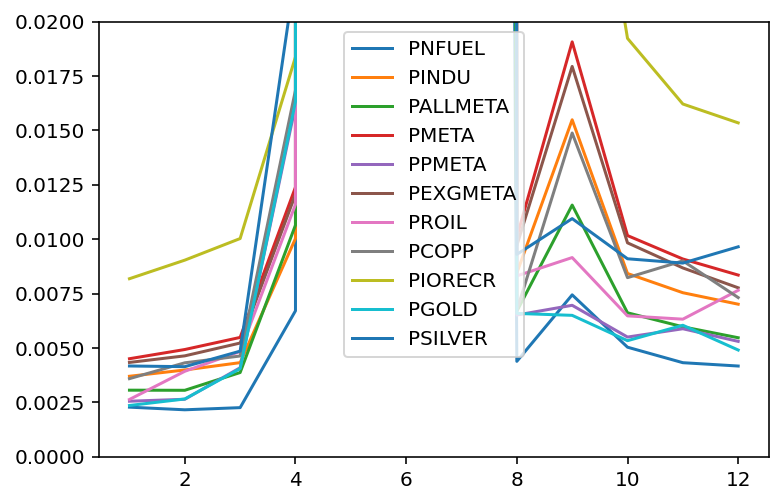

In [29]:
print('Final tabulation MAE for every columns at every lags:')
MAE_final = pd.DataFrame(MAE_final, columns=column_name, index=lags)
print(MAE_final)

MAE_final.plot(ylim=(0,0.02))

VAR(3) is the best for group 5 (has the lowest MAE for each column)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


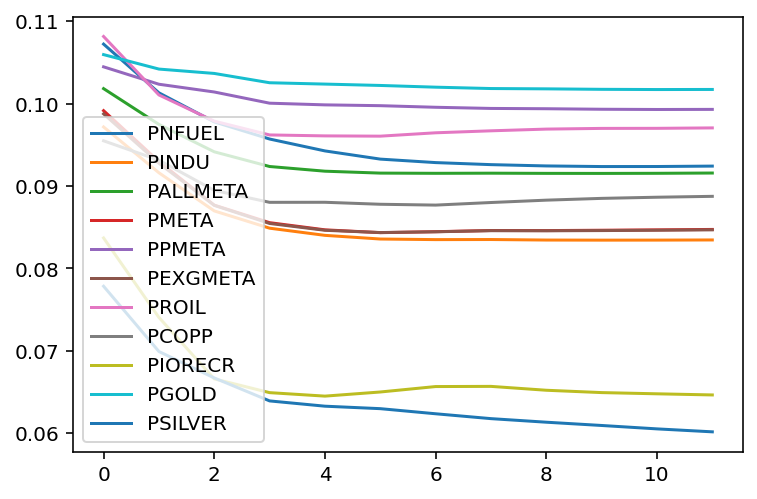

In [30]:
model_final = VAR(df_g5_diff)
result = model_final.fit(2)

last_price_normalized = df_g5.iloc[-1,:]

fc = result.forecast(df_g5_diff.values, steps=12)
fc_diff = pd.DataFrame(fc, columns=column_name)

fc = fc_diff.cumsum()
fc_normalized = last_price_normalized + fc

all_price = pd.concat((df_g5, fc_normalized))

fc_normalized.plot()

In [31]:
df_g5

,PNFUEL,PINDU,PALLMETA,PMETA,PPMETA,PEXGMETA,PROIL,PCOPP,PIORECR,PGOLD,PSILVER
Commodity,,,,,,,,,,,
2012-06-25,0.098883,0.103769,0.101627,0.103585,0.098686,0.102950,0.109908,0.097235,0.116343,0.098936,0.124475
2012-07-25,0.100921,0.101892,0.100207,0.101378,0.098224,0.100734,0.112393,0.099276,0.110566,0.098763,0.121744
2012-08-25,0.100095,0.095550,0.097147,0.093975,0.100415,0.094436,0.113530,0.098310,0.093159,0.100754,0.127359
2012-09-25,0.101409,0.097404,0.101808,0.095629,0.108671,0.097356,0.117827,0.105867,0.085964,0.108091,0.149157
2012-10-25,0.101749,0.100185,0.103709,0.099108,0.108659,0.100369,0.113049,0.105530,0.098477,0.108250,0.147288
...,...,...,...,...,...,...,...,...,...,...,...
2022-03-25,0.130735,0.133365,0.133333,0.142250,0.121828,0.140934,0.118989,0.133920,0.127342,0.120693,0.112018
2022-04-25,0.132056,0.132917,0.131792,0.141036,0.119902,0.138963,0.116887,0.133180,0.126753,0.119830,0.109386
2022-05-25,0.126280,0.122069,0.121245,0.126807,0.113853,0.125023,0.114212,0.122979,0.113292,0.114621,0.097521


In [32]:
def df_grouped_ori(n_group):
    commodity_list = group[group.Group==n_group].Commodity.values
    df_group = df.transpose()[commodity_list]
    return df_group

df_ori = df_grouped_ori(n_group=5)
df_sqrt = np.sqrt(df_ori.sum())
df_ori

,PFERT,POATS,PUREA,PDAP,PMANGAN,PRECARB
Commodity,,,,,,
2012-06-25,174.328876,3.144286,271.493068,509.142857,3038.095238,10842.918450
2012-07-25,179.435405,3.705952,284.777999,515.295455,2954.545455,10160.193870
2012-08-25,189.071548,3.814239,316.256809,506.413044,2644.347826,7154.507372
2012-09-25,189.348356,3.793684,312.788598,531.425000,2603.125000,7197.939369
2012-10-25,184.094470,3.833152,305.492063,530.217391,2668.478261,6838.641907
...,...,...,...,...,...,...
2022-03-25,320.335936,7.134239,584.003080,1049.023565,6577.173913,13245.283800
2022-04-25,334.299872,7.411310,629.051805,1051.400000,6300.000000,10928.504100
2022-05-25,325.213624,6.628182,627.050384,929.305545,6300.000000,11004.919750
